<a href="https://colab.research.google.com/github/mayankjain281/ML_Admission_Probability_Prediction/blob/main/Project_8_Jamboree_Education.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Data Analysis

**Contex:**

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort. They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

**Column Profiling:**

- Serial No. (Unique row ID)
- GRE Scores (out of 340)
- TOEFL Scores (out of 120)
- University Rating (out of 5)
- Statement of Purpose and Letter of Recommendation Strength (out of 5)
- Undergraduate GPA (out of 10)
- Research Experience (either 0 or 1)
- Chance of Admit (ranging from 0 to 1)

**Problem Statment:**

Predict the chances of graduate admission based on the given features.

**Solution Approch:**

Understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. So we can predict one's chances of admission using selected variables.

**Concept Used:**

Exploratory Data Analysis
Linear Regression

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

In [2]:
#Loading the data set
df = pd.read_csv('/content/Jamboree_Admission.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
# Checking the shape of the data
df.shape

(500, 9)

In [4]:
# Checking name of the columns
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
# Correcting the name of the columns
df.rename(columns={'LOR ':'LOR','Chance of Admit ': 'Chance of Admit'},inplace=True)
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [6]:
df.info()
# It seems there is no need for changing the datatype of any column.
# Note: Although, ['University Rating','SOP','LOR'] columns are numeric,
# but we will consider it as an ordinal variable and perform similar analysis as we do for other categorical variables.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
df.isnull().sum()
# There are no missing values present in the dataset.

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
df.nunique()
# Serial No. column has all unique values, those values can be considerd as row lable index.
# But for ML model we do not need Serial No. column so we can remove it.

Serial No.           500
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

In [9]:
df.drop("Serial No.",axis=1,inplace=True)
# Drop the unique row Identifier and unnecessary columns.
# We don't want our model to build some understanding based on row number.

In [10]:
cat_cols = ['University Rating', 'SOP', 'LOR', 'Research']
num_cols = ['GRE Score', 'TOEFL Score', 'CGPA']
target = 'Chance of Admit'

In [11]:
df.describe()
# Chance of Admit ranges from [0.34,0.97]
# GRE Score ranges from [290,340]
# TOEFL Score ranges from [92,120]
# CGPA ranges from [6.80,9.92]
# University Rating, SOP, LOR ranges from [0,5]
# Mean and Median values are apporximately equal for all columns.
# It seems there is no outliers or irrelevant datapoints in all columns.

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [12]:
#Checking how the data is spread in categoric columns
df2=df.copy()
df2
categ_cols = cat_cols
cat_count = df2[categ_cols].melt().groupby(['variable', 'value'])[['value']].size().reset_index(name='counts')
s = df2[categ_cols].melt().variable.value_counts()
cat_count['Percent'] = cat_count['counts'].div(cat_count['variable'].map(s)).mul(100).round().astype('int')
cat_count.groupby(['variable', 'value']).first()
# Applicants with Research 56%
# Applicants with no Research 44%

counts  Percent
variable          value                 
LOR               1.0         1        0
                  1.5        11        2
                  2.0        46        9
                  2.5        50       10
                  3.0        99       20
                  3.5        86       17
                  4.0        94       19
                  4.5        63       13
                  5.0        50       10
Research          0.0       220       44
                  1.0       280       56
SOP               1.0         6        1
                  1.5        25        5
                  2.0        43        9
                  2.5        64       13
                  3.0        80       16
                  3.5        88       18
                  4.0        89       18
                  4.5        63       13
                  5.0        42        8
University Rating 1.0        34        7
                  2.0       126       25
                  3.0       162       32
                  4.0       105       21
                  5.0        73       15

### Univariate Analysis

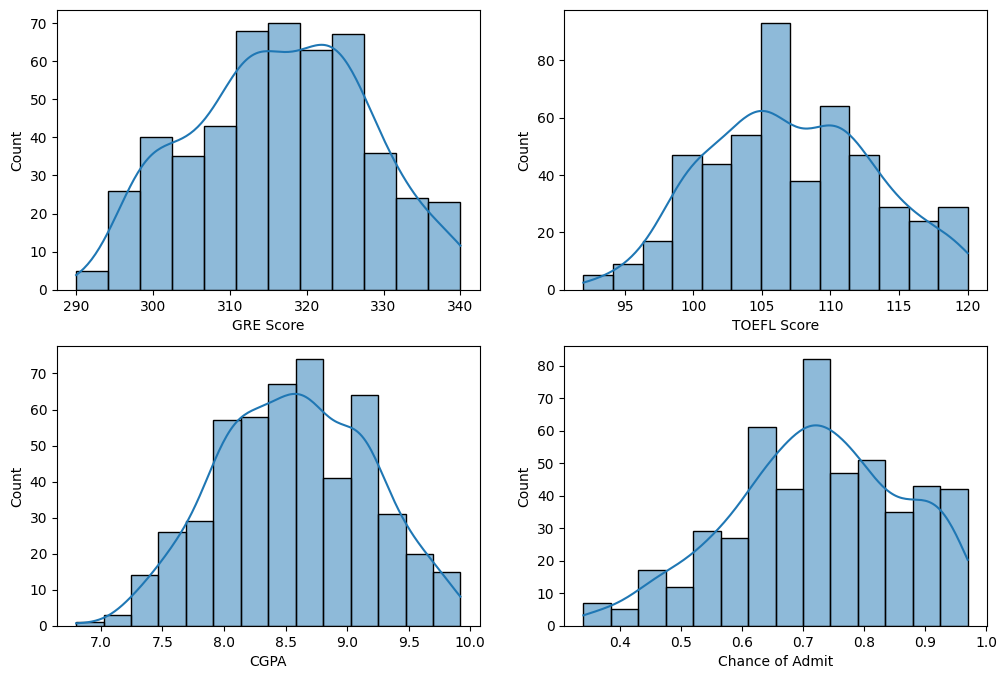

In [13]:
# check distribution of each numerical variable
rows, cols = 2, 2
fig, axs = plt.subplots(rows,cols, figsize=(12, 8))
index = 0
for row in range(rows):
    for col in range(cols):
        sns.histplot(df[num_cols[index]], kde=True, ax=axs[row,col])
        index += 1
    break

sns.histplot(df[num_cols[-1]], kde=True, ax=axs[1,0])
sns.histplot(df[target], kde=True, ax=axs[1,1])
plt.show()
# We can see approximately Normal distribution in all continous columns

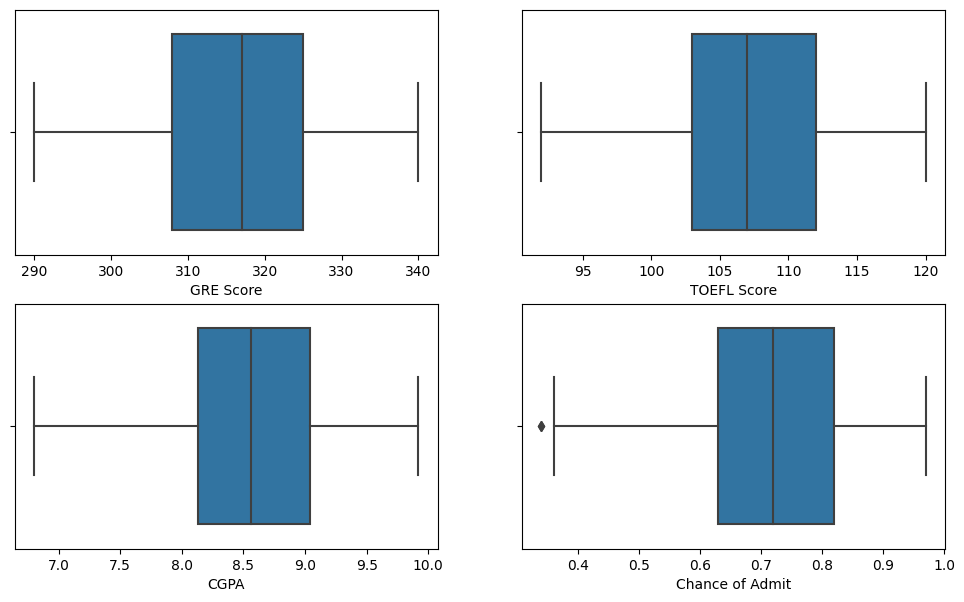

In [14]:
# check for outliers using boxplots
rows, cols = 2, 2
fig, axs = plt.subplots(rows, cols, figsize=(12, 7))

index = 0
for col in range(cols):
    sns.boxplot(x=num_cols[index], data=df, ax=axs[0,index])
    index += 1

sns.boxplot(x=num_cols[-1], data=df, ax=axs[1,0])
sns.boxplot(x=target, data=df, ax=axs[1,1])
plt.show()
# We can see there is no outliers present in any column

In [15]:
# check unique values in categorical variables
for col in cat_cols:
    print("Column:  {:18}   Unique values: {}".format(col, df[col].nunique()))

Column:  University Rating    Unique values: 5
Column:  SOP                  Unique values: 9
Column:  LOR                  Unique values: 9
Column:  Research             Unique values: 2


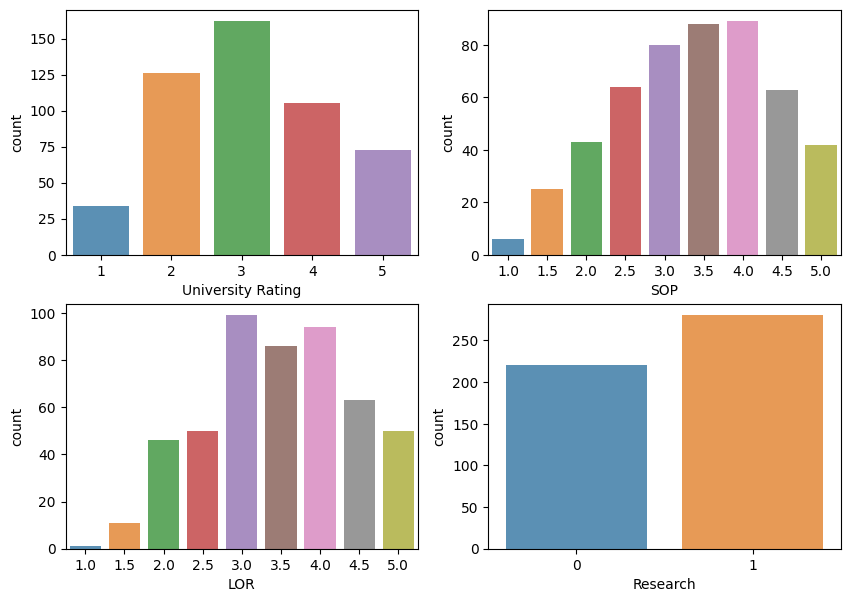

In [16]:
# countplots for categorical variables
cols, rows = 2, 2
fig, axs = plt.subplots(rows, cols, figsize=(10, 7))

index = 0
for row in range(rows):
    for col in range(cols):
        sns.countplot(x=cat_cols[index], data=df, ax=axs[row, col], alpha=0.8)
        index += 1

plt.show()

# Among students who have done research vs those who did not, 56 % said Yes and 44 % said No. We can make pie plot.

### Bivariate Analysis

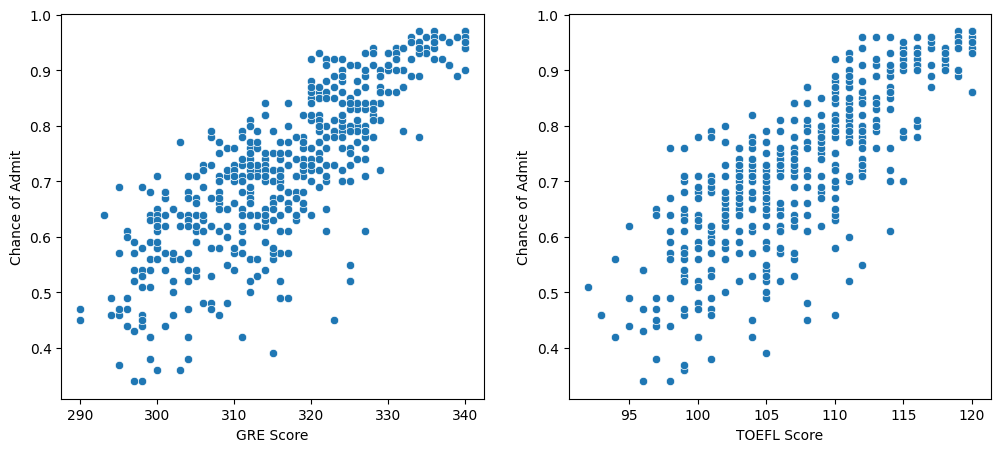

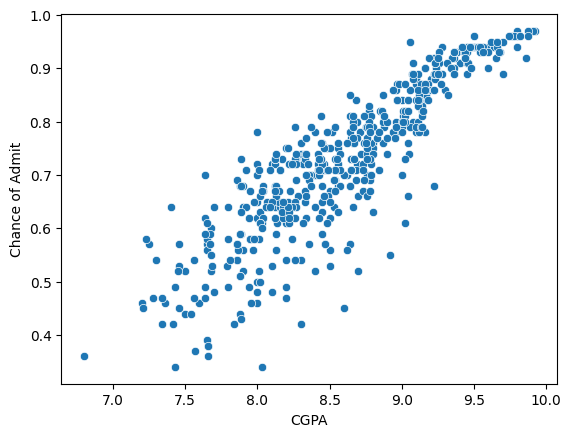

In [17]:
# check relation bw continuous variables & target variable. We can also use sns.regplot()
fig, axs = plt.subplots(1, 2, figsize=(12,5))

sns.scatterplot(x=num_cols[0], y=target, data=df, ax=axs[0])
sns.scatterplot(x=num_cols[1], y=target, data=df, ax=axs[1])
plt.show()
sns.scatterplot(x=num_cols[2], y=target, data=df)
plt.show()

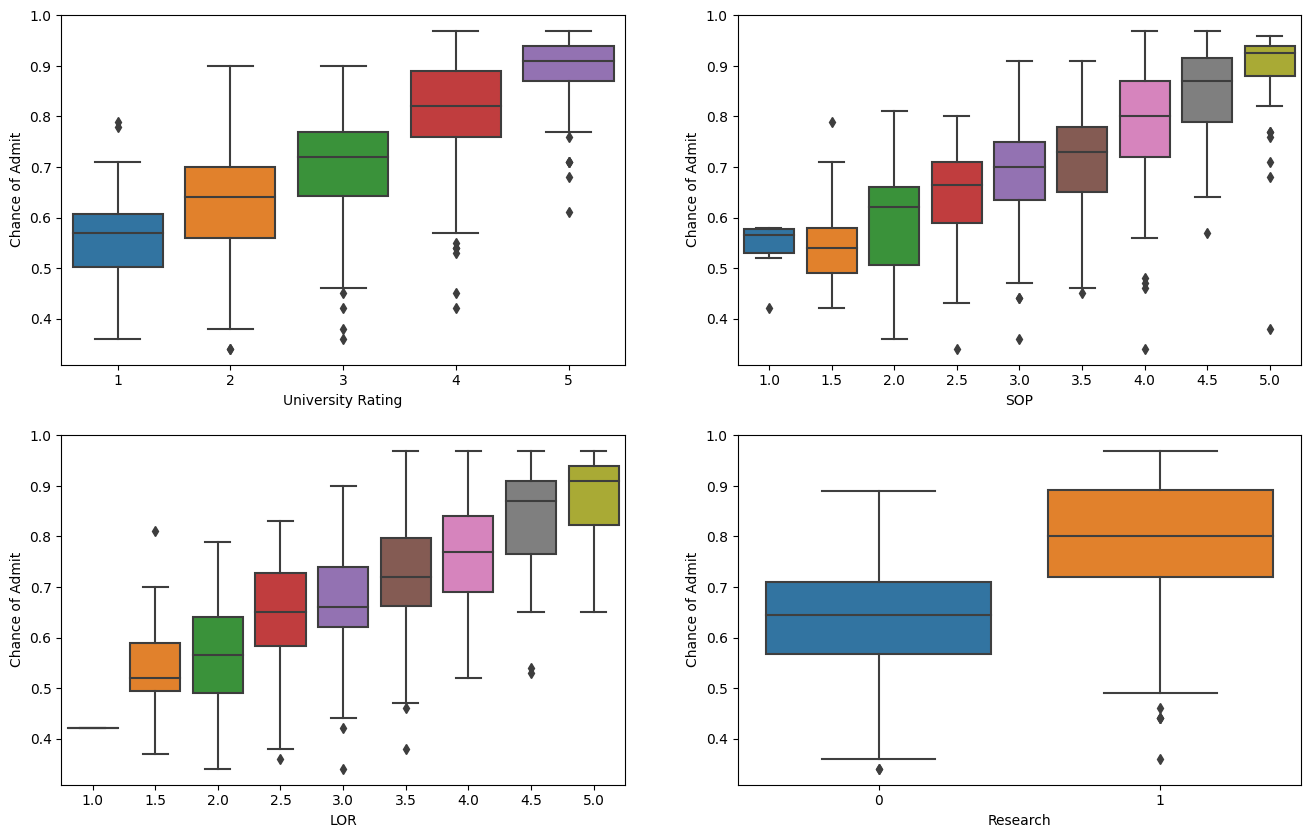

In [18]:
rows, cols = 2,2
fig, axs = plt.subplots(rows, cols, figsize=(16,10))

index = 0
for row in range(rows):
    for col in range(cols):
        sns.boxplot(x=cat_cols[index], y=target, data=df, ax=axs[row,col])
        index += 1

### Multivariate Analysis

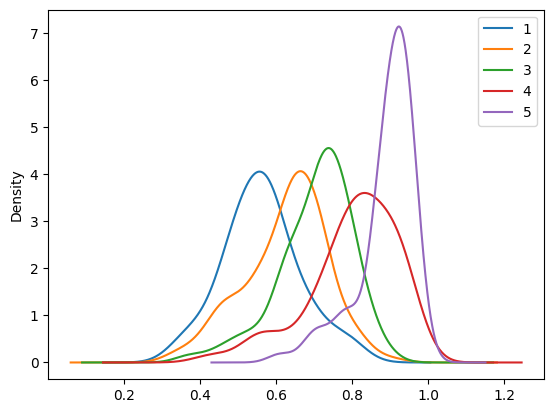

In [19]:
df.groupby('University Rating')['Chance of Admit'].plot.density();
plt.legend();
# Looks like for different University Rating, the Chance of Admit distrubution is different.
# Hence one intuition that can be developed from this plot is that the University Rating variable may turn out to be very important for the ML model. (We will check this later)

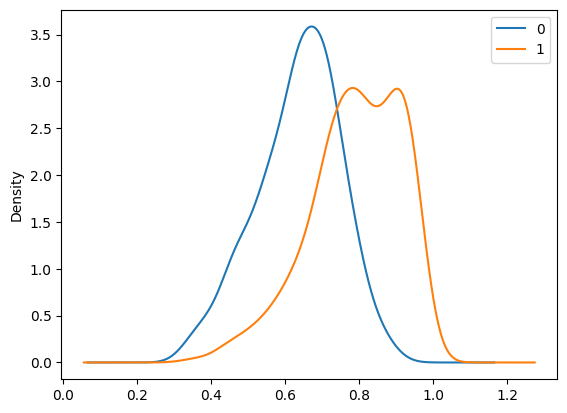

In [20]:
df.groupby('Research')['Chance of Admit'].plot.density();
plt.legend();
# Looks like for different Research type, the Chance of Admit distrubution is different.
# Hence one intuition that can be developed from this plot is that the Researcg variable will not turn out to be very important for the ML model. (We will check this later)

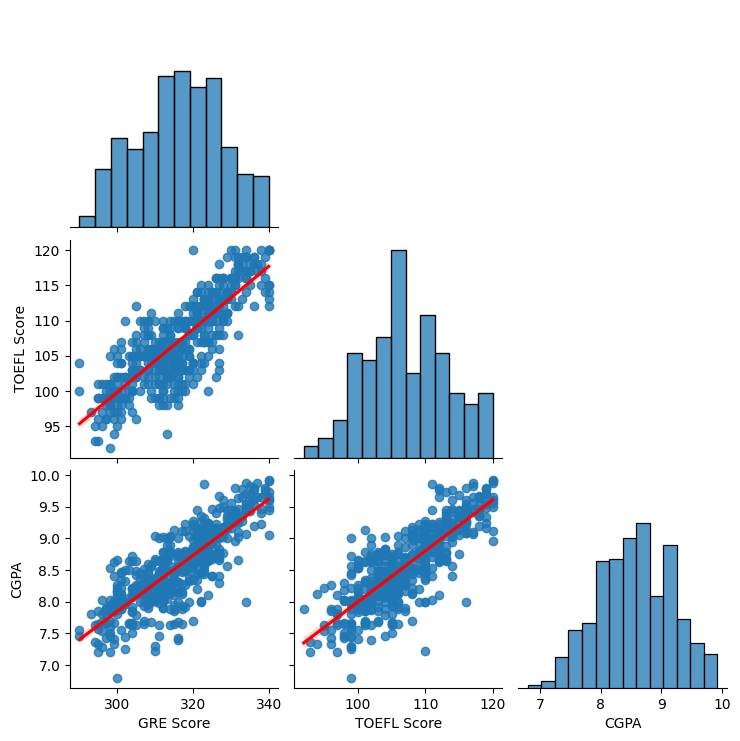

In [21]:
sns.pairplot(df[num_cols], kind="reg", plot_kws={'line_kws':{'color':'red'}}, corner=True)
plt.show()
# All variables are in positive correlation with Chance of Admit variable.
# IF value of any of variable increase then Chance of Admit will also increase.

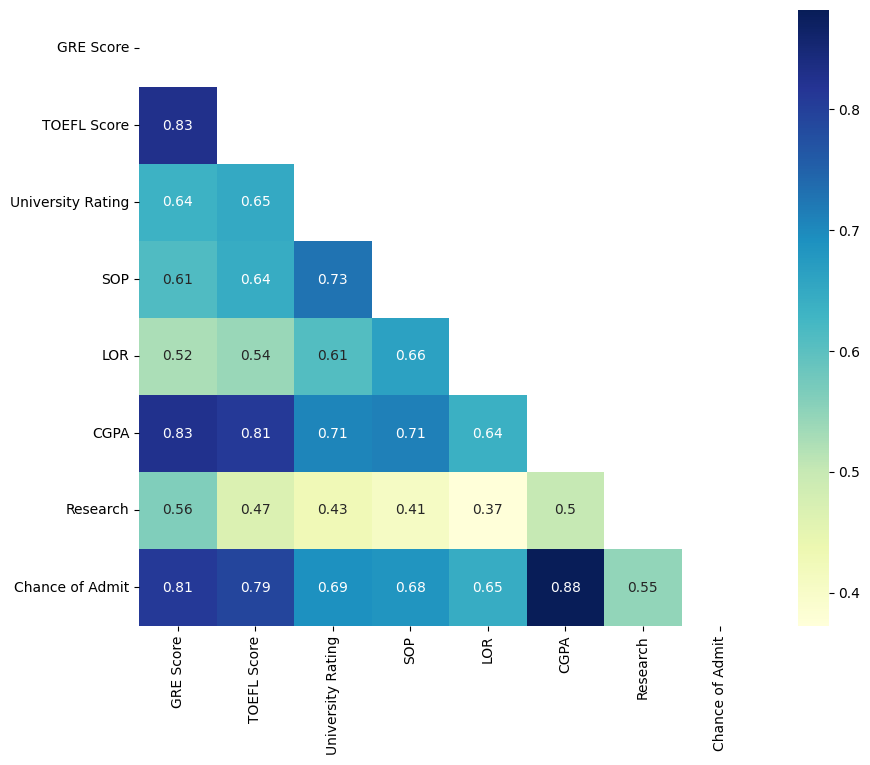

In [22]:
# creating mask for plotting a triangle correlation heatmap
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, mask=mask)
plt.show()
# Checking correlation among independent variables and how they interact with each other.
# CGPA Score, GRE Score, TOEFL Score variables are highly correlated with each other.
# University Rating, SOP LOR variables have some correlation with each other.

## Data Preprocessing

In [23]:
# check for duplicates
df.duplicated().sum()

0

In [24]:
# check for missing values
df.isna().sum().sum()

0

In [25]:
# There are no missing values, outliers and duplicates present in the dataset.

In [26]:
#Data preparation for model building
X = df.drop(columns=[target])
y = df[target]

In [27]:
# standardize the dataset
sc = StandardScaler()
X = sc.fit_transform(X)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [29]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(350, 7) (350,)
(150, 7) (150,)


##LR Model Building

In [30]:
def adjusted_r2(r2, p, n):
    """
    n: no of samples
    p: no of predictors
    r2: r2 score
    """
    adj_r2 = 1 - ((1-r2)*(n-1) / (n-p-1))
    return adj_r2

def get_metrics(y_true, y_pred, p=None):
    n = y_true.shape[0]
    mse = np.sum((y_true - y_pred)**2) / n
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_true - y_pred))
    score = r2_score(y_true, y_pred)
    adj_r2 = None
    if p is not None:
        adj_r2 = adjusted_r2(score, p, n)

    res = {
        "mean_absolute_error": round(mae, 2),
        "rmse": round(rmse, 2),
        "r2_score": round(score, 2),
        "adj_r2": round(adj_r2, 2)
    }
    return res

In [31]:
def train_model(X_train, y_train, X_test, y_test,cols, model_name="linear", alpha=1.0):
    model = None
    if model_name == "lasso":
        model = Lasso(alpha=alpha)
    elif model_name == "ridge":
        model = Ridge(alpha=alpha)
    else:
        model = LinearRegression()

    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    p = X_train.shape[1]
    train_res = get_metrics(y_train, y_pred_train, p)
    test_res = get_metrics(y_test, y_pred_test, p)

    print(f"\n----   {model_name.title()} Regression Model  ----\n")
    print(f"Train MAE: {train_res['mean_absolute_error']} Test MAE: {test_res['mean_absolute_error']}")
    print(f"Train RMSE: {train_res['rmse']} Test RMSE: {test_res['rmse']}")
    print(f"Train R2_score: {train_res['r2_score']} Test R2_score: {test_res['r2_score']}")
    print(f"Train Adjusted_R2: {train_res['adj_r2']} Test Adjusted_R2: {test_res['adj_r2']}")
    print(f"Intercept: {model.intercept_}")
    #print(len(df.columns), len(model.coef_))
    coef_df = pd.DataFrame({"Column": cols, "Coef": model.coef_})
    print(coef_df)
    print("-"*50)
    return model

In [32]:
train_model(X_train, y_train, X_test, y_test,df.columns[:-1], "linear")
train_model(X_train, y_train, X_test, y_test,df.columns[:-1], "ridge")
train_model(X_train, y_train, X_test, y_test,df.columns[:-1], "lasso", 0.001)


----   Linear Regression Model  ----

Train MAE: 0.04 Test MAE: 0.04
Train RMSE: 0.06 Test RMSE: 0.06
Train R2_score: 0.82 Test R2_score: 0.82
Train Adjusted_R2: 0.82 Test Adjusted_R2: 0.81
Intercept: 0.724978121476996
              Column      Coef
0          GRE Score  0.018657
1        TOEFL Score  0.023176
2  University Rating  0.011565
3                SOP -0.000999
4                LOR  0.012497
5               CGPA  0.064671
6           Research  0.013968
--------------------------------------------------

----   Ridge Regression Model  ----

Train MAE: 0.04 Test MAE: 0.04
Train RMSE: 0.06 Test RMSE: 0.06
Train R2_score: 0.82 Test R2_score: 0.82
Train Adjusted_R2: 0.82 Test Adjusted_R2: 0.81
Intercept: 0.7249823645841696
              Column      Coef
0          GRE Score  0.018902
1        TOEFL Score  0.023252
2  University Rating  0.011594
3                SOP -0.000798
4                LOR  0.012539
5               CGPA  0.064004
6           Research  0.013990
-------------

Lasso(alpha=0.001)

In [33]:
# Since model is not overfitting, Results for Linear, Ridge and Lasso are the same.
# R2_score and Adjusted_r2 are almost the same. Hence there are no unnecessary independent variables in the data.

In [94]:
# Statmodels implementation of Linear regression

import statsmodels.api as sm

X_sm = sm.add_constant(X)  #Statmodels default is without intercept, to add intercept we need to add constant

sm_model = sm.OLS(y, X_sm).fit()

print(sm_model.summary())


                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     951.8
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          1.09e-170
Time:                        21:38:16   Log-Likelihood:                 663.74
No. Observations:                 500   AIC:                            -1321.
Df Residuals:                     497   BIC:                            -1309.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7217      0.003    250.794      0.0

## LR Assumption Tests

### Linearity of variables

In [35]:
# It is quite clear from EDA and visual analysis that independent variables are linearly dependent on the target variables.

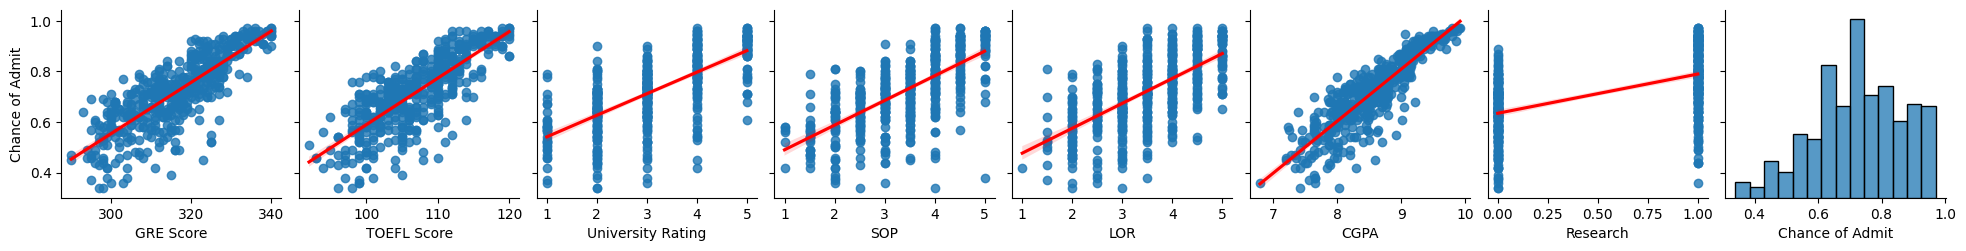

In [36]:
sns.pairplot(df, y_vars=["Chance of Admit"], kind="reg", plot_kws={'line_kws':{'color':'red'}})

# All variables are in positive correlation with Chance of Admit variable.
# IF value of any of variable increase then Chance of Admit will also increase.

### Normality of Residuals

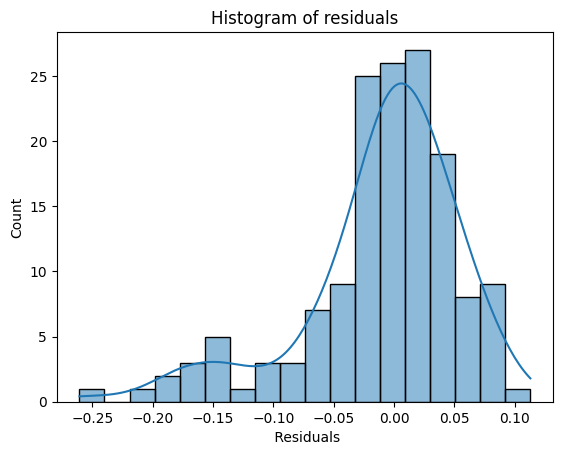

In [57]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
residuals = (y_test - y_pred)
sns.histplot(residuals, kde=True)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")
plt.show()
# Almost bell-shaped curve in residuals distribution

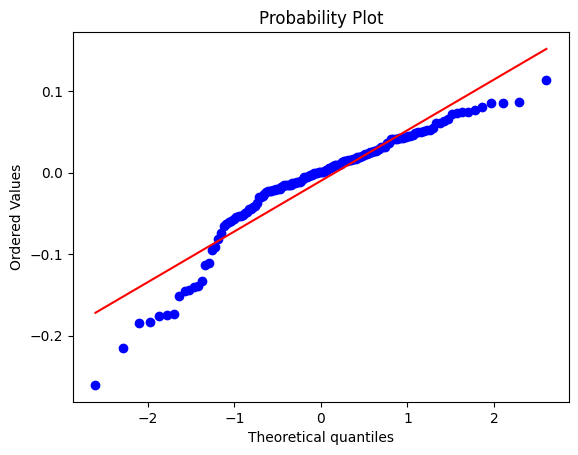

In [65]:
stats.probplot(residuals, plot=plt)
plt.show()
# Points in QQ plot are almost all on the line.
# Data that aligns closely to the line indicates a normal distribution.

In [64]:
# model evaluation- MAE, RMSE, R2 score, Adjusted R2 using sklearn.metic library
import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(y_test, y_pred )
mse = metrics.mean_squared_error(y_test, y_pred )
rmse = np.sqrt(mse) # or mse**(0.5)
r2 = metrics.r2_score(y_test,y_pred)
adj_r2 = 1 - ( 1-r2 ) * ( len(y_test) - 1 ) / ( len(y_test) - X_test.shape[1] - 1 )
print("***Resulted erros on test data***")
print("MAE:",round(mae,2))
print("MSE:", round(mse,2))
print("RMSE:", round(rmse,2))
print("R-Squared:", round(r2,2))
print("Adjusted R-Squared:", round(adj_r2,2))

***Resulted erros on test data***
MAE: 0.05
MSE: 0.0
RMSE: 0.07
R-Squared: 0.81
Adjusted R-Squared: 0.81


In [92]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error,mean_absolute_percentage_error

r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error( y_test, y_pred )
rmse = np.sqrt( mean_squared_error( y_test, y_pred ))
mape = mean_absolute_percentage_error(y_test,y_pred)

# initialise data of lists.
perf_data = [[r2],[mae],[mse],[rmse],[mape]]
# Creates pandas DataFrame.
eval_ = pd.DataFrame(perf_data,columns= ["Scores"] ,index = ["R-Squared","Mean Absolute Error","Mean Square Error",
                                                             "Root Mean Square Error","Mean Absolute Percentage Error"])
eval_.head()

,Scores
R-Squared,0.808323
Mean Absolute Error,0.045288
Mean Square Error,0.004293
Root Mean Square Error,0.065518
Mean Absolute Percentage Error,0.077133


### Mean of Residuals

In [39]:
# It is clear from RMSE that Mean of Residuals is almost zero.
abs(residuals.mean())

0.010793738256654513

<Axes: ylabel='Chance of Admit'>

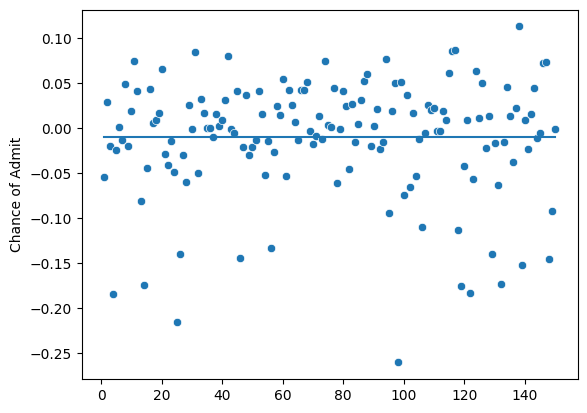

In [71]:
sns.scatterplot(x=np.arange(1,len(y_test)+1,1),y=residuals)
sns.lineplot(x=np.arange(1,len(y_test)+1,1),y=residuals.mean())
# They are pretty symmetrically distributed

### Test for Homoscedasticity

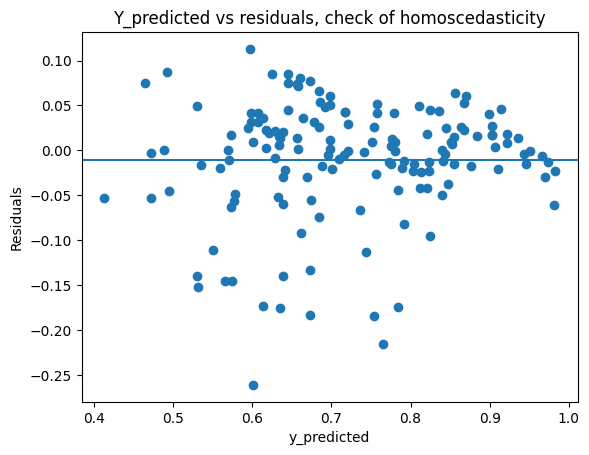

In [69]:
plt.scatter(y_pred, residuals)
plt.xlabel('y_predicted')
plt.ylabel('Residuals')
plt.axhline(y=residuals.mean())
plt.title("Y_predicted vs residuals, check of homoscedasticity")
plt.show()

In [42]:
# Since the plot is not creating a cone type shape. Hence there is no homoscedasticity present in the data.

### Mutlicollinearity Check

In [43]:
def vif(newdf):
    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["feature"] = newdf.columns

    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(newdf.values, i) for i in range(len(newdf.columns))]
    return vif_data

In [44]:
res = vif(df.iloc[:,:-1])
res

,feature,VIF
0,GRE Score,1308.061089
1,TOEFL Score,1215.951898
2,University Rating,20.933361
3,SOP,35.265006
4,LOR,30.911476
5,CGPA,950.817985
6,Research,2.869493


In [45]:
# drop GRE Score and again calculate the VIF
res = vif(df.iloc[:, 1:-1])
res

,feature,VIF
0,TOEFL Score,639.741892
1,University Rating,19.884298
2,SOP,33.733613
3,LOR,30.631503
4,CGPA,728.778312
5,Research,2.863301


In [46]:
# # drop TOEFL Score and again calculate the VIF
res = vif(df.iloc[:,2:-1])
res

,feature,VIF
0,University Rating,19.777410
1,SOP,33.625178
2,LOR,30.356252
3,CGPA,25.101796
4,Research,2.842227


In [47]:
# Now lets drop the SOP and again calculate VIF
res = vif(df.iloc[:,2:-1].drop(columns=['SOP']))
res

,feature,VIF
0,University Rating,15.140770
1,LOR,26.918495
2,CGPA,22.369655
3,Research,2.819171


In [48]:
# lets drop the LOR as well
newdf = df.iloc[:,2:-1].drop(columns=['SOP'])
newdf = newdf.drop(columns=['LOR'], axis=1)
res = vif(newdf)
res

,feature,VIF
0,University Rating,12.498400
1,CGPA,11.040746
2,Research,2.783179


In [49]:
# drop the University Rating
newdf = newdf.drop(columns=['University Rating'])
res = vif(newdf)
res

,feature,VIF
0,CGPA,2.455008
1,Research,2.455008


## Model performance evaluation

In [50]:
# now again train the model with these only two features
X = df[['CGPA', 'Research']]
sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [51]:
model = train_model(X_train, y_train, X_test, y_test, ['CGPA', 'Research'], "linear")
train_model(X_train, y_train, X_test, y_test, ['CGPA', 'Research'], "ridge")
train_model(X_train, y_train, X_test, y_test, ['CGPA', 'Research'], "lasso", 0.001)


----   Linear Regression Model  ----

Train MAE: 0.05 Test MAE: 0.05
Train RMSE: 0.06 Test RMSE: 0.07
Train R2_score: 0.78 Test R2_score: 0.81
Train Adjusted_R2: 0.78 Test Adjusted_R2: 0.81
Intercept: 0.7247774222727991
     Column      Coef
0      CGPA  0.112050
1  Research  0.020205
--------------------------------------------------

----   Ridge Regression Model  ----

Train MAE: 0.05 Test MAE: 0.05
Train RMSE: 0.06 Test RMSE: 0.07
Train R2_score: 0.78 Test R2_score: 0.81
Train Adjusted_R2: 0.78 Test Adjusted_R2: 0.81
Intercept: 0.7247830300095277
     Column      Coef
0      CGPA  0.111630
1  Research  0.020362
--------------------------------------------------

----   Lasso Regression Model  ----

Train MAE: 0.05 Test MAE: 0.05
Train RMSE: 0.06 Test RMSE: 0.07
Train R2_score: 0.78 Test R2_score: 0.81
Train Adjusted_R2: 0.78 Test Adjusted_R2: 0.81
Intercept: 0.7247713356661623
     Column      Coef
0      CGPA  0.111344
1  Research  0.019571
---------------------------------------

Lasso(alpha=0.001)

In [52]:
# After removing collinear features using VIF and using only two features.
# R2_score and Adjusted_r2 are still the same as before the testing dataset.

## Insights

- Based on the EDA: There are no missing values, outliers and duplicates present in the dataset.

- Among students who have done research vs those who did not, 56 % said Yes and 44 % said No

- More than 50% of the data has a university rating of 3 or 2

- A majority of students (56%) have letter of recommendation values between 3.0 and 4.5

- A strong positive relationship exists between Chance of admit and numerical variables (GRE & TOEFL score and CGPA).

- GRE Score , TOFEL Score and CGPA are highly correlated (0.80). We should drop two of these.

- Based on the analysis an upward trend for each categorical variable. A higher rating value increases the chance of admission.


* Indepedent variables are linearly correlated with dependent variables.

* Multicollinearity was present in the within independet variables.

* After removing collinear features there are only two variables which are important in making predictions for the target variables.

* Research and CGPA variables have VIF scores below 5, indicating low multicollinearity.

* Following are the final model results on the test data:

* RMSE: 0.07

* MAE: 0.05

* R2_score: 0.81

* Adjusted_R2: 0.81

## Recommendations

* CGPA and Research are two variables which are important in making the prediction for Chance of Admit.

* CGPA is the most important varibale in making the prediction for the Chance of Admit.

* Based on the regression analysis, we can observe that the GPA, TOEFL, and GRE are the three most important factors influencing admission chances.

* from CGPA, TOEFL Score, GRE Score any one of varibale can be helpful in the prediction for the Chance of Admit.


* We can use any of above model, where students/learners can come to the website and check their probability of getting into the admission in IVY league college.

* We can use any of model like Linear regression, Ridge regression or Lasso regression etc. All those models have shown appoximately similar performace.

* Good rating in SOP and LOR can also increase the probability of getting admission. Students should also have strength in their Statement of Purpose (SOP) and Letter of Recommendation (LOR). Jamboree can help students to write a good SOP and get recommendation letters from tier-1 college professors.
* It is important that the institute or Jamboree conducts seminars to make sure the students are aware of the important requirements for getting admission and how to get research experience from the institute.

## Advance Visual Analysis

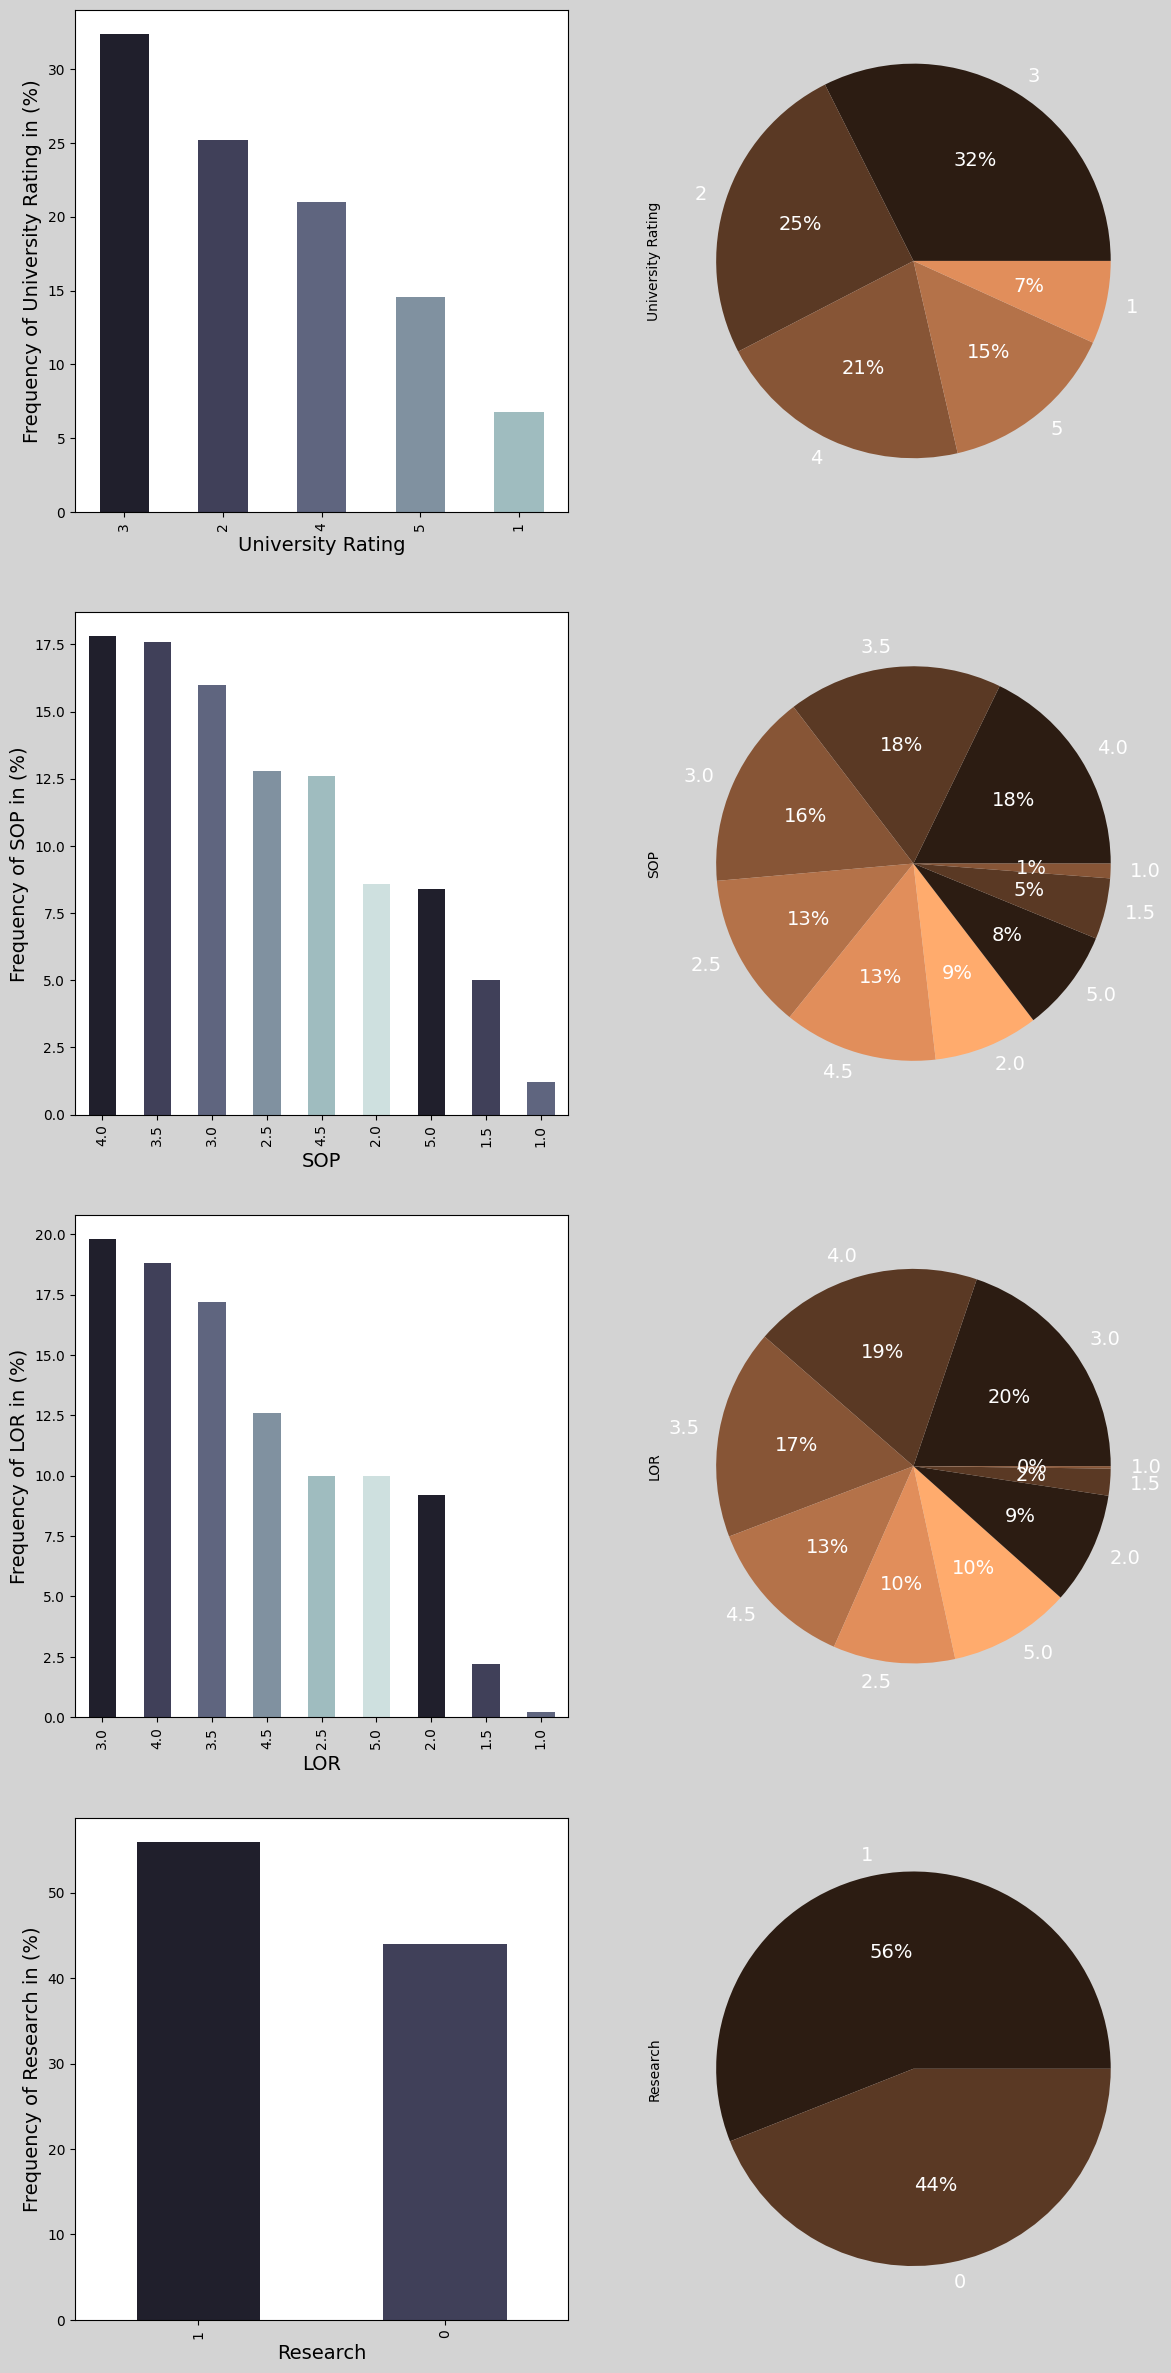

In [82]:
# Frequency of values in each categoric feature and percentage.
def cat_analysis(df, colnames, nrows=2,mcols=2,width=20,height=30, sortbyindex=False):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height))
    fig.set_facecolor(color = 'lightgrey')
    string = "Frequency of "
    rows = 0
    for colname in colnames:
        count = (df[colname].value_counts(normalize=True)*100)
        string += colname + ' in (%)'
        if sortbyindex:
                count = count.sort_index()
        count.plot.bar(color=sns.color_palette("bone"),ax=ax[rows][0])
        ax[rows][0].set_ylabel(string, fontsize=14)
        ax[rows][0].set_xlabel(colname, fontsize=14)
        count.plot.pie(colors = sns.color_palette("copper"),autopct='%0.0f%%',
                       textprops={'fontsize': 14,'color':'white'},ax=ax[rows][1])
        string = "Frequency of "
        rows += 1

cat_cols = ['University Rating', 'SOP','LOR', 'Research']
cat_analysis(df,cat_cols,4,2,14,30)

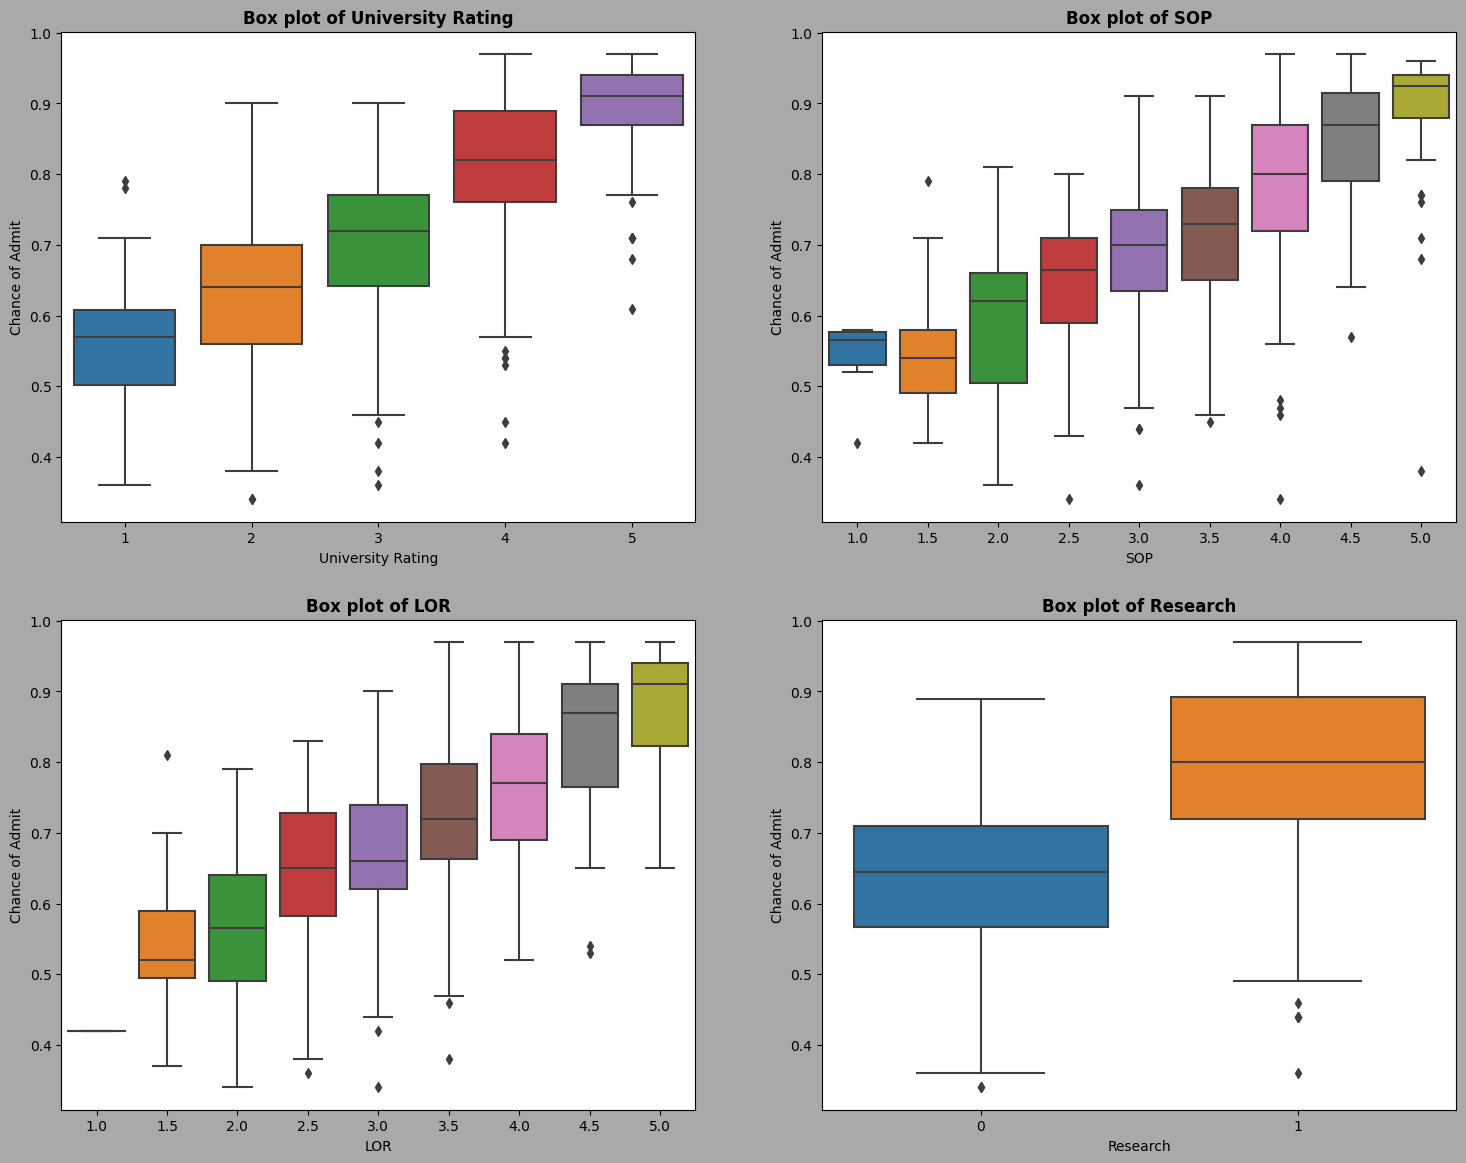

In [86]:
# Boxplot for categorical variables

def box_plot(colname,y):
    fig = plt.figure(figsize=(18, 14))
    fig.set_facecolor("darkgrey")
    for var in colname:
        plt.subplot(2,2,colname.index(var)+1)
        sns.boxplot(x = var, y = y, data = df)
        plt.title("Box plot of " + var, fontweight="bold")
    plt.show()

box_plot(['University Rating', 'SOP', 'LOR','Research'],'Chance of Admit')

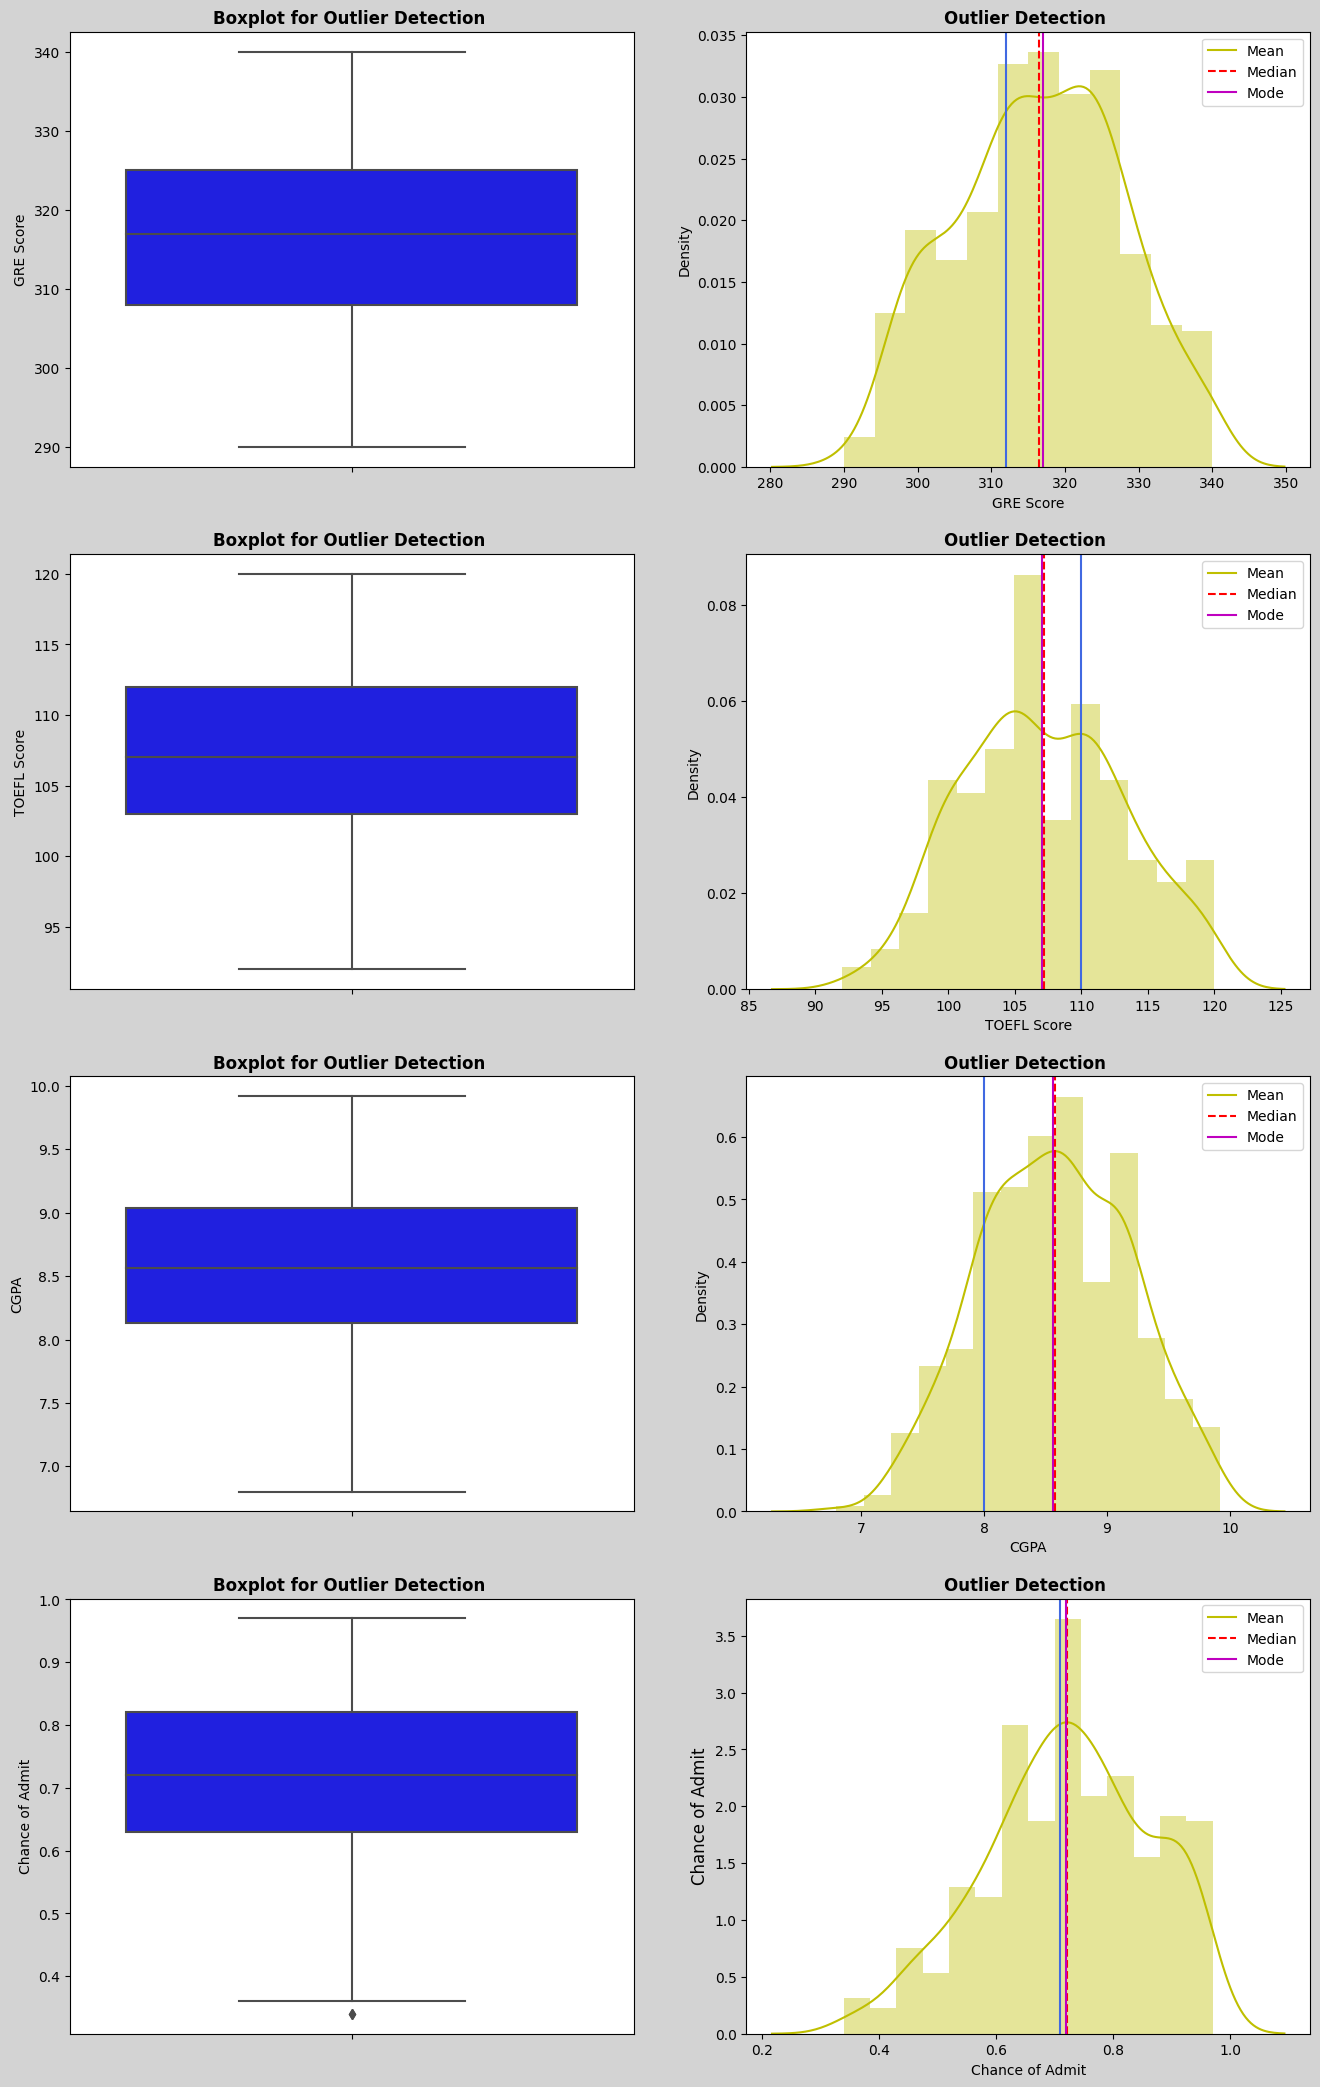

In [91]:
# Boxplot for Numerical Variables - (Distribution check and Outlier detection)

import warnings
warnings.filterwarnings('ignore')

def outlier_detect(df,colname,nrows=2,mcols=2,width=20,height=15):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height))
    fig.set_facecolor("lightgrey")
    rows = 0
    for var in colname:
        ax[rows][0].set_title("Boxplot for Outlier Detection ", fontweight="bold")
        plt.ylabel(var, fontsize=12)
        sns.boxplot(y = df[var],color='b',ax=ax[rows][0])

        # plt.subplot(nrows,mcols,pltcounter+1)
        sns.distplot(df[var],color='y',ax=ax[rows][1])
        ax[rows][1].axvline(df[var].mean(), color='r', linestyle='--', label="Mean")
        ax[rows][1].axvline(df[var].median(), color='m', linestyle='-', label="Median")
        ax[rows][1].axvline(df[var].mode()[0], color='royalblue', linestyle='-', label="Mode")
        ax[rows][1].set_title("Outlier Detection ", fontweight="bold")
        ax[rows][1].legend({'Mean':df[var].mean(),'Median':df[var].median(),'Mode':df[var].mode()})
        rows += 1
    plt.show()

col_num = [ 'GRE Score', 'TOEFL Score', 'CGPA','Chance of Admit']
outlier_detect(df,col_num,4,2,16,26)